In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
ds1radiotemp = pd.read_csv("../../dataset_1_radioTemperatures_20210303.csv",sep=';',dtype={'id_audit':np.str})
ds2powerclass = pd.read_csv("../../dataset_2_powerClass_20210303.csv", sep=";", dtype={'id_audit':np.str})
ds3radioid = pd.read_csv("../../dataset_3_radioId_20210303.csv",sep=";", dtype={'id_audit':np.str})

In [3]:
ds1radiotemp.dropna(inplace=True)

In [4]:
sensorData = ds1radiotemp.pivot_table(index=['id_audit'], columns=['field'],values=['value'])
sensorData = sensorData.droplevel(0, axis=1).reset_index()
sensorData.id_audit = sensorData.id_audit.astype(str)

In [5]:
sensorData.drop(['TSensor_C1_','TSensor_D11_','TSensor_D12_','TSensor_D13_','TSensor_D14_','TSensor_D15_'
                ,'TSensor_D16_','TSensor_D17_','TSensor_D2_','TSensor_D3_','TSensor_D7_','TSensor_P39_'
                ,'TSensor_P40_','TSensor_P41_','TSensor_P42_','TSensor_P43_','TSensor_P44_','TSensor_P45_'
                ,'TSensor_P46_','TSensor_T63_','TSensor_T64_','TSensor_W73_','TSensor_W74_'], axis=1, inplace=True)

In [6]:
sensorDataRed = sensorData.iloc[:,1:].applymap(lambda x: np.nan if (x < -40 or x> 125) else x)
sensorDataRed['id_audit'] = sensorData.id_audit.values
sensorDataRed.dropna(inplace=True)
sensorDataRed.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67269 entries, 0 to 67454
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TSensor_D10_  67269 non-null  float64
 1   TSensor_D18_  67269 non-null  float64
 2   TSensor_D19_  67269 non-null  float64
 3   TSensor_D4_   67269 non-null  float64
 4   TSensor_D5_   67269 non-null  float64
 5   TSensor_D6_   67269 non-null  float64
 6   TSensor_D8_   67269 non-null  float64
 7   TSensor_D9_   67269 non-null  float64
 8   TSensor_P23_  67269 non-null  float64
 9   TSensor_P24_  67269 non-null  float64
 10  TSensor_P25_  67269 non-null  float64
 11  TSensor_P26_  67269 non-null  float64
 12  TSensor_P27_  67269 non-null  float64
 13  TSensor_P28_  67269 non-null  float64
 14  TSensor_P29_  67269 non-null  float64
 15  TSensor_P30_  67269 non-null  float64
 16  TSensor_P31_  67269 non-null  float64
 17  TSensor_P32_  67269 non-null  float64
 18  TSensor_P33_  67269 non-nu

In [7]:
sensorDataRed.head()

field,TSensor_D10_,TSensor_D18_,TSensor_D19_,TSensor_D4_,TSensor_D5_,TSensor_D6_,TSensor_D8_,TSensor_D9_,TSensor_P23_,TSensor_P24_,TSensor_P25_,TSensor_P26_,TSensor_P27_,TSensor_P28_,TSensor_P29_,TSensor_P30_,TSensor_P31_,TSensor_P32_,TSensor_P33_,TSensor_P34_,TSensor_P35_,TSensor_P36_,TSensor_P37_,TSensor_P38_,TSensor_R47_,TSensor_R48_,TSensor_R49_,TSensor_R50_,TSensor_R51_,TSensor_R52_,TSensor_R53_,TSensor_R54_,TSensor_T55_,TSensor_T56_,TSensor_T57_,TSensor_T58_,TSensor_T59_,TSensor_T60_,TSensor_T61_,TSensor_T62_,TSensor_T65_,TSensor_T66_,TSensor_T67_,TSensor_T68_,TSensor_T69_,TSensor_T70_,TSensor_T71_,TSensor_T72_,id_audit
0,25.3,38.5,28.3,28.0,27.8,32.8,23.3,23.3,36.0,39.0,38.5,33.0,21.0,21.5,22.0,22.0,41.5,41.0,39.5,35.0,20.5,20.5,21.0,20.5,32.3,32.3,28.6,28.6,23.0,23.0,24.3,24.3,36.0,36.0,33.0,33.0,21.0,21.0,22.0,22.0,36.0,39.0,38.5,33.0,21.0,22.0,22.0,22.0,1000033
1,31.5,35.1,37.0,27.3,27.3,29.8,29.8,29.5,25.5,26.5,26.5,24.5,34.0,35.5,36.5,33.0,24.0,25.5,25.0,23.5,33.5,35.5,36.0,36.0,29.9,29.9,27.5,27.5,30.1,30.1,32.0,32.0,25.5,25.5,24.0,24.0,34.0,34.0,33.0,33.0,25.5,26.5,26.5,24.0,34.0,35.0,36.5,33.0,1000034
2,29.0,43.3,30.7,32.5,32.8,32.8,25.8,25.8,36.5,43.5,45.5,42.0,23.5,24.5,25.0,25.0,42.5,45.5,46.5,43.0,23.5,23.5,24.0,24.5,32.1,32.1,34.6,34.6,25.9,25.9,27.6,27.6,37.0,37.0,42.0,42.0,24.0,24.0,25.0,25.0,37.0,43.5,45.5,42.0,24.0,24.0,25.0,25.0,1000035
3,57.3,74.9,62.3,62.8,62.3,67.5,57.0,56.8,74.0,78.0,77.0,71.5,64.5,63.5,58.0,54.0,79.0,79.0,77.0,73.0,65.0,66.0,60.5,56.0,67.6,67.6,65.1,65.1,58.0,58.0,56.3,56.3,74.0,74.0,72.0,72.0,64.5,64.5,54.0,54.0,74.0,78.0,77.0,72.0,64.5,63.0,58.0,54.0,1000044
4,38.0,49.2,40.9,37.0,36.8,42.5,33.8,33.5,48.1,50.5,48.8,44.4,39.4,41.3,41.8,40.1,50.6,50.5,48.4,45.3,40.5,42.5,43.0,43.0,45.7,45.7,49.6,49.6,45.1,45.1,39.4,39.4,48.1,48.1,44.4,44.4,39.4,39.4,40.1,40.1,48.1,50.5,48.8,44.4,39.4,41.3,41.8,40.1,1000047


In [8]:
sensors = sensorDataRed.columns.values[:-1]
sensorDataRed.shape,sensors

((67269, 49),
 array(['TSensor_D10_', 'TSensor_D18_', 'TSensor_D19_', 'TSensor_D4_',
        'TSensor_D5_', 'TSensor_D6_', 'TSensor_D8_', 'TSensor_D9_',
        'TSensor_P23_', 'TSensor_P24_', 'TSensor_P25_', 'TSensor_P26_',
        'TSensor_P27_', 'TSensor_P28_', 'TSensor_P29_', 'TSensor_P30_',
        'TSensor_P31_', 'TSensor_P32_', 'TSensor_P33_', 'TSensor_P34_',
        'TSensor_P35_', 'TSensor_P36_', 'TSensor_P37_', 'TSensor_P38_',
        'TSensor_R47_', 'TSensor_R48_', 'TSensor_R49_', 'TSensor_R50_',
        'TSensor_R51_', 'TSensor_R52_', 'TSensor_R53_', 'TSensor_R54_',
        'TSensor_T55_', 'TSensor_T56_', 'TSensor_T57_', 'TSensor_T58_',
        'TSensor_T59_', 'TSensor_T60_', 'TSensor_T61_', 'TSensor_T62_',
        'TSensor_T65_', 'TSensor_T66_', 'TSensor_T67_', 'TSensor_T68_',
        'TSensor_T69_', 'TSensor_T70_', 'TSensor_T71_', 'TSensor_T72_'],
       dtype=object))

In [ ]:
#from sklearn.cluster import DBSCAN
#dbscan=DBSCAN()
from sklearn.ensemble import IsolationForest
foscan = IsolationForest(contamination=0.01)

In [ ]:
masks = []
for aSensor in sensors:
    yhat = foscan.fit_predict(sensorDataRed[aSensor].values.reshape(-1, 1))
    mask = yhat == -1
    masks.append(mask)

In [12]:
import pickle

In [13]:
#with open("masksData.dat", "wb") as fp:
#    pickle.dump(masks,fp)

In [14]:
with open("masksData.dat", "rb") as fp:
    masks = pickle.load(fp)

In [15]:
#sensorDataRed.to_pickle("sensorDataRed.pkl")
sensorDataRed = pd.read_pickle("sensorDataRed.pkl")

In [16]:
maskpd = pd.DataFrame(data=masks, index=sensors)

In [17]:
maskpd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,67019,67020,67021,67022,67023,67024,67025,67026,67027,67028,67029,67030,67031,67032,67033,67034,67035,67036,67037,67038,67039,67040,67041,67042,67043,67044,67045,67046,67047,67048,67049,67050,67051,67052,67053,67054,67055,67056,67057,67058,67059,67060,67061,67062,67063,67064,67065,67066,67067,67068,67069,67070,67071,67072,67073,67074,67075,67076,67077,67078,67079,67080,67081,67082,67083,67084,67085,67086,67087,67088,67089,67090,67091,67092,67093,67094,67095,67096,67097,67098,67099,67100,67101,67102,67103,67104,67105,67106,67107,67108,67109,67110,67111,67112,67113,67114,67115,67116,67117,67118,67119,67120,67121,67122,67123,67124,67125,67126,67127,67128,67129,67130,67131,67132,67133,67134,67135,67136,67137,67138,67139,67140,67141,67142,67143,67144,67145,67146,67147,67148,67149,67150,67151,67152,67153,67154,67155,67156,67157,67158,67159,67160,67161,67162,67163,67164,67165,67166,67167,67168,67169,67170,67171,67172,67173,67174,67175,67176,67177,67178,67179,67180,67181,67182,67183,67184,67185,67186,67187,67188,67189,67190,67191,67192,67193,67194,67195,67196,67197,67198,67199,67200,67201,67202,67203,67204,67205,67206,67207,67208,67209,67210,67211,67212,67213,67214,67215,67216,67217,67218,67219,67220,67221,67222,67223,67224,67225,67226,67227,67228,67229,67230,67231,67232,67233,67234,67235,67236,67237,67238,67239,67240,67241,67242,67243,67244,67245,67246,67247,67248,67249,67250,67251,67252,67253,67254,67255,67256,67257,67258,67259,67260,67261,67262,67263,67264,67265,67266,67267,67268
TSensor_D10_,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [18]:
#maskpd.to_pickle("maskpd.pkl")
maskpd = pd.read_pickle("maskpd.pkl")

In [19]:
for mask in maskpd.values:
    sensorDataMasked = sensorDataRed[~mask]

In [20]:
sensorDataMasked.shape

(66637, 49)

In [21]:
maskpd.loc['TSensor_D10_'].value_counts()

False    66606
True       663
Name: TSensor_D10_, dtype: int64

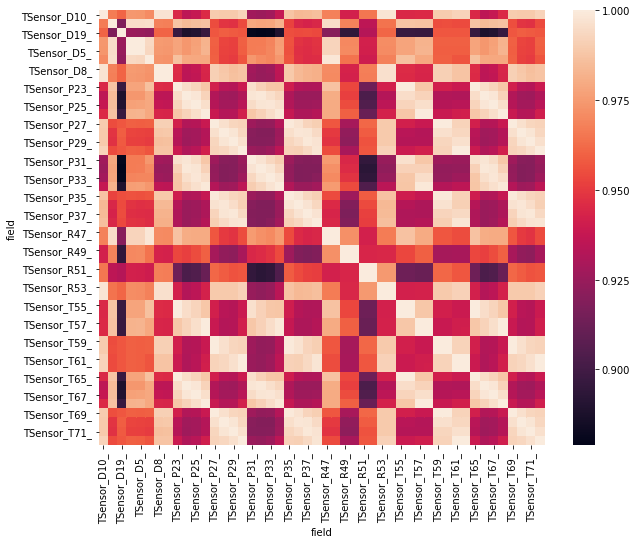

In [22]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(sensorDataMasked.iloc[:,:-1].corr(), ax=ax)

In [23]:
sensorCorr = sensorDataMasked.iloc[:,:-1].corr()

In [24]:
sensorCorr.head()

field,TSensor_D10_,TSensor_D18_,TSensor_D19_,TSensor_D4_,TSensor_D5_,TSensor_D6_,TSensor_D8_,TSensor_D9_,TSensor_P23_,TSensor_P24_,TSensor_P25_,TSensor_P26_,TSensor_P27_,TSensor_P28_,TSensor_P29_,TSensor_P30_,TSensor_P31_,TSensor_P32_,TSensor_P33_,TSensor_P34_,TSensor_P35_,TSensor_P36_,TSensor_P37_,TSensor_P38_,TSensor_R47_,TSensor_R48_,TSensor_R49_,TSensor_R50_,TSensor_R51_,TSensor_R52_,TSensor_R53_,TSensor_R54_,TSensor_T55_,TSensor_T56_,TSensor_T57_,TSensor_T58_,TSensor_T59_,TSensor_T60_,TSensor_T61_,TSensor_T62_,TSensor_T65_,TSensor_T66_,TSensor_T67_,TSensor_T68_,TSensor_T69_,TSensor_T70_,TSensor_T71_,TSensor_T72_
field,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TSensor_D10_,1.000000,0.966811,0.960593,0.974433,0.973895,0.970931,0.997565,0.997526,0.944767,0.935393,0.937873,0.945419,0.989839,0.989271,0.989354,0.992283,0.927613,0.925835,0.927708,0.937687,0.987664,0.984225,0.984790,0.986169,0.968265,0.968265,0.942195,0.942195,0.965369,0.965369,0.998007,0.998007,0.944797,0.944798,0.945420,0.945422,0.989840,0.989840,0.992283,0.992283,0.944799,0.935395,0.937878,0.945429,0.989844,0.989282,0.989354,0.992283
TSensor_D18_,0.966811,1.000000,0.918064,0.995635,0.995656,0.995972,0.967921,0.967402,0.987645,0.984684,0.985902,0.986905,0.955065,0.948629,0.947601,0.954213,0.978738,0.978137,0.978274,0.982452,0.952374,0.944391,0.943164,0.944224,0.995706,0.995706,0.968547,0.968547,0.935655,0.935655,0.964073,0.964073,0.987661,0.987662,0.986916,0.986917,0.955071,0.955074,0.954201,0.954203,0.987668,0.984686,0.985908,0.986921,0.955090,0.948648,0.947602,0.954196
TSensor_D19_,0.960593,0.918064,1.000000,0.925614,0.924747,0.923070,0.960457,0.960409,0.896956,0.888126,0.890096,0.896492,0.957261,0.959030,0.958245,0.957021,0.880423,0.878930,0.879984,0.889234,0.955390,0.954446,0.954679,0.953980,0.920414,0.920414,0.894396,0.894396,0.933143,0.933143,0.960908,0.960908,0.896988,0.896989,0.896485,0.896485,0.957260,0.957258,0.957026,0.957027,0.896981,0.888127,0.890117,0.896487,0.957254,0.959040,0.958246,0.957035
TSensor_D4_,0.974433,0.995635,0.925614,1.000000,0.999675,0.993963,0.975270,0.974803,0.977859,0.974058,0.977223,0.982481,0.959505,0.953139,0.952028,0.959765,0.966468,0.966605,0.968899,0.976249,0.956306,0.948010,0.946716,0.948391,0.992809,0.992809,0.970190,0.970190,0.942181,0.942181,0.971536,0.971536,0.977881,0.977882,0.982493,0.982494,0.959514,0.959517,0.959754,0.959756,0.977885,0.974062,0.977229,0.982498,0.959531,0.953159,0.952035,0.959751
TSensor_D5_,0.973895,0.995656,0.924747,0.999675,1.000000,0.993848,0.974719,0.974241,0.978024,0.974337,0.977538,0.982843,0.958990,0.952563,0.951451,0.959275,0.966742,0.966939,0.969298,0.976634,0.955788,0.947445,0.946126,0.947834,0.992741,0.992741,0.970337,0.970337,0.941621,0.941620,0.970980,0.970980,0.978045,0.978046,0.982855,0.982856,0.958997,0.959000,0.959267,0.959269,0.978049,0.974343,0.977543,0.982861,0.959015,0.952582,0.951458,0.959263


In [25]:
pairListpd = pd.DataFrame(columns=['1','2','3','4','5', 'c1','c2','c3','c4','c5'])

for aSensor, value in sensorCorr.items():
    #print(aSensor, value[0])
    valueNew = value.drop(aSensor).sort_values(ascending=False)
    valueItem = valueNew.index[0:5].values
    valueItem = np.append(valueItem, valueNew[0:5].values)
    pairListpd = pairListpd.append(pd.Series(valueItem, name=aSensor, index=['1','2','3','4','5', 'c1','c2','c3','c4','c5']))

In [26]:
pairListpd.loc['TSensor_P29_'][['1','2','3','4','5']]

1    TSensor_T71_
2    TSensor_P37_
3    TSensor_T70_
4    TSensor_P28_
5    TSensor_P38_
Name: TSensor_P29_, dtype: object

In [ ]:
resMask = (np.abs(residuals) > (abs(residuals.mean()) + zscore * residuals.std())).reshape(-1)
resMask.shape, scanMask.shape

In [ ]:
resMask & scanMask

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()

In [ ]:
from sklearn.linear_model import LinearRegression
lnclf = LinearRegression()

In [ ]:
involvedSensors.append(pd.Series(index))

In [ ]:
finalMasks = pd.DataFrame(columns=maskpd.columns)
zscore = 5
for index, value in pairListpd.iterrows(): 
    involvedSensors = pairListpd.loc[index][['1','2','3','4','5']]
    print("Processing ... " + index + " with " + str(list(involvedSensors.values)))
    lnclf.fit(sensorDataMasked[involvedSensors].values, sensorDataMasked[index].values.reshape(-1, 1))
    ypred1 = lnclf.predict(sensorDataRed[involvedSensors].values)
    residuals = sensorDataRed[index].values.reshape(-1, 1)-ypred1
    resMask = (np.abs(residuals) > (abs(residuals.mean()) + zscore * residuals.std())).reshape(-1)
    
    scanMask = (dbscan.fit(sensorDataRed[involvedSensors.append(pd.Series(index))].values.reshape(-1, 1)).labels_) == -1
    
    resMask = resMask & scanMask
    finalMasks =  finalMasks.append(pd.Series(resMask.reshape(-1), name=index, index=maskpd.columns))

In [ ]:
def plotResult(mainSensor):
    print("Processing main sensor: " + mainSensor)
    mainMask = finalMasks.loc[mainSensor].values.reshape(-1,1)
    involvedSensors = pairListpd.loc[mainSensor][['1','2','3','4','5']]
    corrValues = pairListpd.loc[mainSensor][['c1','c2','c3','c4','c5']]
    for aSensor, aCorr in zip(involvedSensors, corrValues):
        print("Display " + aSensor + "corr value " + str(aCorr))
        sensorData = sensorDataRed[[mainSensor, aSensor]].copy()
        sensorData['resMask'] = mainMask
        fig, ax = plt.subplots(figsize=(20,10)) 
        ax = plt.axes(yscale='linear')
        ax.grid();
        sns.scatterplot(data = sensorData, x = aSensor, y = mainSensor, hue="resMask",ax=ax, palette="deep", alpha=0.5)
        plt.show()

In [ ]:
plotResult('TSensor_T72_')

In [ ]:
finalMasks.loc['TSensor_T72_'].value_counts()

In [ ]:
sensorDataRed[index].values

In [ ]:
sensorData['TSensor_P24_'].head()

In [ ]:
 dbscan.fit(sensorData['TSensor_P24_'].dropna().values.reshape(-1, 1))

In [ ]:
dbscan.labels_ 

In [ ]:
plotResult('TSensor_P29_')

In [ ]:
finalMasks.loc['TSensor_P29_'].value_counts()

In [ ]:
def getOutliers(mainSensor):
    outlierdf = pd.DataFrame(sensorDataRed[mainSensor])
    outlierdf['resMask'] = finalMasks.loc[mainSensor].values.reshape(-1,1)
    return outlierdf[outlierdf['resMask']]

In [ ]:
abcd= getOutliers('TSensor_P29_')

In [ ]:
abcd.shape

In [ ]:
ax = sns.distplot(abcd.TSensor_D10_, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3}, kde=False)

In [ ]:
ax = sns.distplot(sensorDataRed.TSensor_D10_, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3}, kde=False)

In [ ]:
sensorData = sensorDataRed[[mainSensor, aSensor]].copy()
sensorData['resMask'] = mainMask

In [ ]:
involvedSensors.append(pd.Series('TSensor_P29_'))

In [ ]:
involvedSensors = pairListpd.loc['TSensor_P29_'][['1','2','3','4','5']]
corrValues = pairListpd.loc['TSensor_P29_'][['c1','c2','c3','c4','c5']]
for aSensor, aCorr in zip(involvedSensors, corrValues):
    print("Display " + aSensor + "corr value " + str(aCorr))

In [ ]:
finalMasks.to_csv("finalMask.csv", index_label='sensor')

In [ ]:
finalMasksTest = pd.read_csv("finalMask.csv", index_col='sensor')

In [ ]:
finalMasksTest.head()

In [ ]:
finalMasks.head()

In [ ]:
sensorDataRed.to_csv("sensorRedData.csv", index_label='field')

In [ ]:
sensorDataRedTest = pd.read_csv("sensorRedData.csv", index_col='field')

In [ ]:
sensorDataRedTest.head()

In [ ]:
sensorDataRed.head()

In [ ]:
sensorDataSelTest = pd.DataFrame(sensorDataRedTest['TSensor_D10_'])
sensorDataSelTest['resMask'] = finalMasksTest.loc['TSensor_D10_'].values.reshape(-1,1)
sensorDataSelTest.head()

In [27]:
sensorDataRedfull = pd.read_csv("../../sensorDataFullMasked.csv", index_col='id')

In [30]:
sensorDataRedfull.head()

,TSensor_D10_,TSensor_D18_,TSensor_D19_,TSensor_D4_,TSensor_D5_,TSensor_D6_,TSensor_D8_,TSensor_D9_,TSensor_P23_,TSensor_P24_,TSensor_P25_,TSensor_P26_,TSensor_P27_,TSensor_P28_,TSensor_P29_,TSensor_P30_,TSensor_P31_,TSensor_P32_,TSensor_P33_,TSensor_P34_,TSensor_P35_,TSensor_P36_,TSensor_P37_,TSensor_P38_,TSensor_R47_,TSensor_R48_,TSensor_R49_,TSensor_R50_,TSensor_R51_,TSensor_R52_,TSensor_R53_,TSensor_R54_,TSensor_T55_,TSensor_T56_,TSensor_T57_,TSensor_T58_,TSensor_T59_,TSensor_T60_,TSensor_T61_,TSensor_T62_,TSensor_T65_,TSensor_T66_,TSensor_T67_,TSensor_T68_,TSensor_T69_,TSensor_T70_,TSensor_T71_,TSensor_T72_,id_audit,scaled_TSensor_D10_,scaled_TSensor_D18_,scaled_TSensor_D19_,scaled_TSensor_D4_,scaled_TSensor_D5_,scaled_TSensor_D6_,scaled_TSensor_D8_,scaled_TSensor_D9_,scaled_TSensor_P23_,scaled_TSensor_P24_,scaled_TSensor_P25_,scaled_TSensor_P26_,scaled_TSensor_P27_,scaled_TSensor_P28_,scaled_TSensor_P29_,scaled_TSensor_P30_,scaled_TSensor_P31_,scaled_TSensor_P32_,scaled_TSensor_P33_,scaled_TSensor_P34_,scaled_TSensor_P35_,scaled_TSensor_P36_,scaled_TSensor_P37_,scaled_TSensor_P38_,scaled_TSensor_R47_,scaled_TSensor_R48_,scaled_TSensor_R49_,scaled_TSensor_R50_,scaled_TSensor_R51_,scaled_TSensor_R52_,scaled_TSensor_R53_,scaled_TSensor_R54_,scaled_TSensor_T55_,scaled_TSensor_T56_,scaled_TSensor_T57_,scaled_TSensor_T58_,scaled_TSensor_T59_,scaled_TSensor_T60_,scaled_TSensor_T61_,scaled_TSensor_T62_,scaled_TSensor_T65_,scaled_TSensor_T66_,scaled_TSensor_T67_,scaled_TSensor_T68_,scaled_TSensor_T69_,scaled_TSensor_T70_,scaled_TSensor_T71_,scaled_TSensor_T72_,masks_TSensor_D10_,masks_TSensor_D18_,masks_TSensor_D19_,masks_TSensor_D4_,masks_TSensor_D5_,masks_TSensor_D6_,masks_TSensor_D8_,masks_TSensor_D9_,masks_TSensor_P23_,masks_TSensor_P24_,masks_TSensor_P25_,masks_TSensor_P26_,masks_TSensor_P27_,masks_TSensor_P28_,masks_TSensor_P29_,masks_TSensor_P30_,masks_TSensor_P31_,masks_TSensor_P32_,masks_TSensor_P33_,masks_TSensor_P34_,masks_TSensor_P35_,masks_TSensor_P36_,masks_TSensor_P37_,masks_TSensor_P38_,masks_TSensor_R47_,masks_TSensor_R48_,masks_TSensor_R49_,masks_TSensor_R50_,masks_TSensor_R51_,masks_TSensor_R52_,masks_TSensor_R53_,masks_TSensor_R54_,masks_TSensor_T55_,masks_TSensor_T56_,masks_TSensor_T57_,masks_TSensor_T58_,masks_TSensor_T59_,masks_TSensor_T60_,masks_TSensor_T61_,masks_TSensor_T62_,masks_TSensor_T65_,masks_TSensor_T66_,masks_TSensor_T67_,masks_TSensor_T68_,masks_TSensor_T69_,masks_TSensor_T70_,masks_TSensor_T71_,masks_TSensor_T72_,totalMask,lnmasks_TSensor_D10_,lnmasks_TSensor_D18_,lnmasks_TSensor_D19_,lnmasks_TSensor_D4_,lnmasks_TSensor_D5_,lnmasks_TSensor_D6_,lnmasks_TSensor_D8_,lnmasks_TSensor_D9_,lnmasks_TSensor_P23_,lnmasks_TSensor_P24_,lnmasks_TSensor_P25_,lnmasks_TSensor_P26_,lnmasks_TSensor_P27_,lnmasks_TSensor_P28_,lnmasks_TSensor_P29_,lnmasks_TSensor_P30_,lnmasks_TSensor_P31_,lnmasks_TSensor_P32_,lnmasks_TSensor_P33_,lnmasks_TSensor_P34_,lnmasks_TSensor_P35_,lnmasks_TSensor_P36_,lnmasks_TSensor_P37_,lnmasks_TSensor_P38_,lnmasks_TSensor_R47_,lnmasks_TSensor_R48_,lnmasks_TSensor_R49_,lnmasks_TSensor_R50_,lnmasks_TSensor_R51_,lnmasks_TSensor_R52_,lnmasks_TSensor_R53_,lnmasks_TSensor_R54_,lnmasks_TSensor_T55_,lnmasks_TSensor_T56_,lnmasks_TSensor_T57_,lnmasks_TSensor_T58_,lnmasks_TSensor_T59_,lnmasks_TSensor_T60_,lnmasks_TSensor_T61_,lnmasks_TSensor_T62_,lnmasks_TSensor_T65_,lnmasks_TSensor_T66_,lnmasks_TSensor_T67_,lnmasks_TSensor_T68_,lnmasks_TSensor_T69_,lnmasks_TSensor_T70_,lnmasks_TSensor_T71_,lnmasks_TSensor_T72_
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,25.3,38.5,28.3,28.0,27.8,32.8,23.3,23.3,36.0,39.0,38.5,33.0,21.0,21.5,22.0,22.0,41.5,41.0,39.5,35.0,20.5,20.5,21.0,20.5,32.3,32.3,28.6,28.6,23.0,23.0,24.3,24.3,36.0,36.0,33.0,33.0,21.0,21.0,22.0,22.0,36.0,39.0,38.5,33.0,21.0,22.0,22.0,22.0,1000033,-1.150183,-0.911046,-1.177595,-0.927274,-0.941577